## 3. Domínios de frequência e tempo

Quando falamos sobre o comportamento de uma função senoidal no domínio do tempo, queremos dizer a projeção da curva sobre o plano temporal. Analogamente, uma função senoidal pode ser expressa do domínio da frequência, nesse caso, estamos falando da projeção da curva no plano da frequência. Veja a figura abaixo.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/24.02.02-time_frequency.png" width="360" align="left">

Fonte: <a href="https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html">Kong e Siauw (2021)</a>.


A projeção da curva no plano das frequências é uma medida da amplitude positiva máxima da função senoidal. Marcando a amplitude máxima na posição correspondente no eixo de frequência e o ângulo de fase tem-se informação suficiente para reproduzir a forma de uma curva no domínio do tempo. 

Assim, podemos descrever uma ou mais curvas por meio de seus diagramas de amplitude-frequência e de fase-frequência. Estes gráficos fornecem uma forma alternativa de apresentar ou resumir as características pertinentes da curva senoidal. Esses diagramas são chamados de *linhas espectrais* de amplitude e de fase.

As linhas espectrais fornecem uma visualização da estrutura dos harmônicos que compõem um sinal por meio de uma descrição gráfica dessa estrutura. São como “impressões digitais” que ajudam a caracterizar e a entender uma forma de onda complicada. Elas são particularmente valiosas para a análise da estrutura de sinais complexos decompondo-os em ondas mais simples.


A **forma amplitude-fase** da série de Fourier é útil para a análise no domínio da frequência. Nesse formato, a série é escrita como 

$$
f(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty} A_n \cos \left(n \omega_0 t+\phi_n\right)
$$

onde $A_n$ e $\phi_n$ são a amplitude e a fase do espectro de $f(t)$:

$$
A_n=\sqrt{a_n^2+b_n^2} \quad \text { e } \quad \phi_n=-\tan ^{-1}\left(\frac{b_n}{a_n}\right)
$$

sendo $a_n$ e $b_n$ os coeficientes da forma trigonométrica da série. A forma amplitude-fase está relacionada com a forma polar do número complexo $a_n-ib_n$, em que a amplitude é o módulo e a fase é o ângulo do ponto ($a_n, b_n$) em coordenadas polares no plano complexo (<a href="https://pt.wikipedia.org/wiki/Plano_complexo">plano de Argand-Gauss</a>).


Vamos começar os experimentos computacionais modelando uma onda quadrada e aproximando-a por uma série de Fourier. Em seguida veremos como descrever as funções que formam a série por meio de diagramas no domínio da frequência.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Exemplo 1:** Modelando uma onda quadrada de período $T=1$ e amplitude $A=1$; obtendo a série de fourier com 5 termos e plotando a curva, a série e a suas componentes harmônicas. 

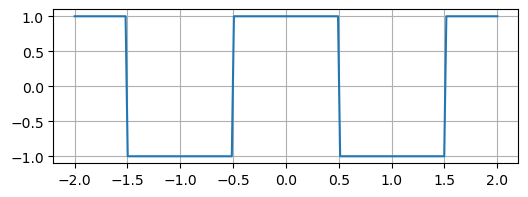

In [2]:
T = 1.0

def f(x):
    if abs(x)>T: 
        return f(abs(x)-2*T)
    if (x>-T/2)and(x<T/2): 
        return 1
    if (x<-T/2)or(x>T/2): 
        return -1

plt.figure(figsize = (6, 2))
x = np.linspace(-2*T,2*T,200)
plt.plot(x,[f(xi) for xi in x])
plt.grid()

A onda quadrada par é aproximada pela série de Fourier com coeficientes $a_0=0$, $bn=0$ e 

$$
a_k=\left\{\begin{array}{cl}
4 /(k \pi) & \text { para } k=1,5,9, \ldots \\
-4 /(k \pi) & \text { para } k=3,7,11, \ldots \\
0 & \text { para } k=\text { inteiros pares }
\end{array}\right.
$$

O código abaixo pode ser usado para gerar alguns termos da série.

In [3]:
import sympy as sp
t, w0 = sp.symbols('t, w_0')
serie = 0

for n in range(1,10,2):
    serie += (-1)**(n//2)*(4/sp.pi)*sp.cos(n*w0*t)/n
serie

4*cos(t*w_0)/pi - 4*cos(3*t*w_0)/(3*pi) + 4*cos(5*t*w_0)/(5*pi) - 4*cos(7*t*w_0)/(7*pi) + 4*cos(9*t*w_0)/(9*pi)

In [4]:
s = sp.lambdify(t, serie) 

O código abaixo plota os gráficos da onda quadrada, a aproximação pos série de Fourier e as componentes harmônicas da onda (termos da série).

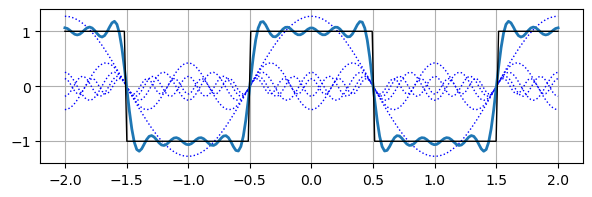

In [5]:
ti = np.linspace(-2*T,2*T,200)
soma=0
w = np.pi/T
#w = 2*np.pi/T
plt.figure(figsize = (7, 2))
for n in range(1,10,2):
    comp = (-1)**(n//2)*(4/np.pi)*np.cos(n*w*ti)/n
    soma += comp
    plt.plot(ti, comp, 'b:',lw=1)
    
plt.plot(ti, soma, lw=2)
plt.plot(x,[f(xi) for xi in x], 'k', lw=1.0)
plt.grid()
plt.show()

Notemos agora que podemos descrever uma função periódica por uma série de senos ou de cossenos em que são conhecidas as frequências e as amplitudes de cada termo, além do ângulo de fase ($\theta$).

No exemplo acima, para as amplitudes $4/\pi, -4/3\pi, 4/5\pi, -4/7\pi,...$, tem-se as frequências são determinadas por $w_0, 3w_0, 5w_0, 7w_0,...$. A figura abaixo mostra as linhas espectrais de amplitude e fase para a onda quadrada do exemplo anterior. Esta é uma forma de representar a função em termos de ampliude, frequência e fase (Fonte: [Chapra e Canale, 2016](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/491)).

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/linha_espectral_e_fase.png?raw=true" width="600">

A seguir vemos um exemplo da representação das linhas espectrais de amplitude e de fase de uma série de Fourier com cinco termos que aproxima a onda quadrada do Exemplo 1.

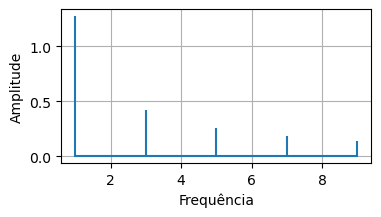

In [6]:
freq = np.arange(1,10,2)
plt.figure(figsize = (4, 2))
plt.stem(freq , abs(4/np.pi/freq), 
         markerfmt=" ", basefmt="-")

plt.xlabel( 'Frequência' ) 
plt.ylabel( 'Amplitude' )
plt.grid()
plt.show()

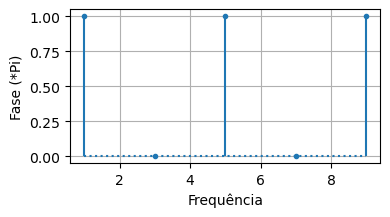

In [7]:
freq = np.arange(1,10,2)
plt.figure(figsize = (4, 2))
plt.stem(freq , (-1)**(freq//2)>0, 
         markerfmt=".", basefmt=":")

plt.xlabel( 'Frequência' ) 
plt.ylabel( 'Fase (*Pi)' )
plt.grid()
plt.show()

____________________________________________
**Exercício 1:**
Um sinal formado por 3 ondas senoidais com frequências de 1 Hz, 4 Hz e 7 Hz, amplitudes 3, 1 e 0.5 e todos ângulos de fase iguais a zero, para uma taxa de amostragem de 100 Hz, tem a aparência do primeiro gráfico a seguir. O seu diagrama de linhas espectrais de amplitudes é mostrado no segundo gráfico, na sequência. O diagrama de linhas de fase não é mostrado pois os ângulos são todos iguais a zero.





Com base no exemplo dado, recrie o sinal cujo diagrama de linhas espectrais de amplitudes é mostrado na sequência. Considere novamente os ângulos de fase todos iguais a zero e uma taxa de amostragem de 100 Hz.

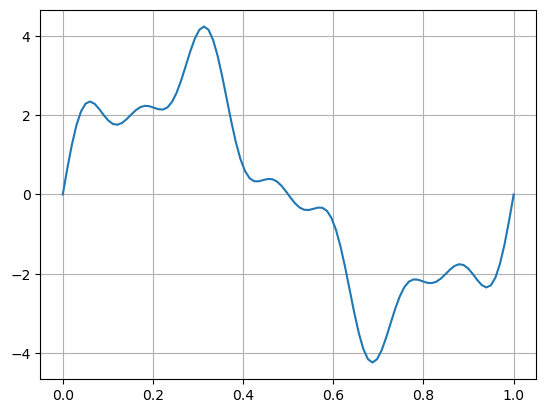

In [8]:
sinal = lambda A, w, t: A*np.sin(2*np.pi*w*t)
t = np.linspace(0,1,100)
x = sinal(3,1,t)+sinal(1,4,t)+sinal(0.5,7,t)
plt.plot(t,x)

plt.grid()
plt.show()

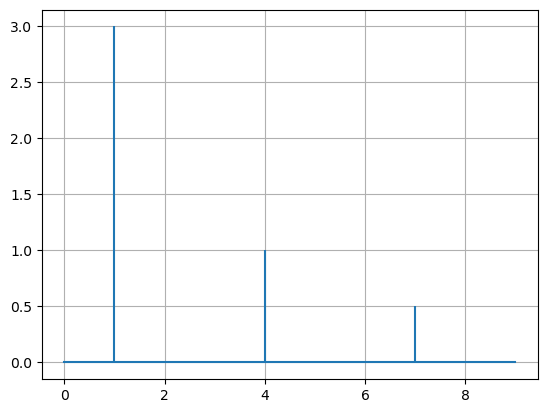

In [9]:
freq = np.arange(0,100)
amp = np.full(len(freq),0.)
amp[1] = 3
amp[4] = 1
amp[7] = 0.5

plt.stem(freq[0:10] , amp[0:10], 
         markerfmt=" ", basefmt="-")
plt.grid()
plt.show()

Agora, com base no exemplo acima, recrie o sinal cujo diagrama de linhas espectrais de amplitudes é mostrado abaixo:

<img src="https://github.com/tiagoburiol/MatComp_IV/blob/main/imagens/fig03_1.png?raw=true" width="360" align="left">

Comparando com o resultado usando o pacote FFT de SciPy.

In [10]:
# Usando o pacote pronto
from scipy.fft import fft
fourier = fft('''SEUS DADOS AQUI''')
plt.stem(np.arange(len('''SEUS DADOS AQUI''')) , 
         np.abs('''SEUS DADOS AQUI'''), 
         markerfmt=" ", basefmt="-b")
plt.show()

ValueError: could not convert string to float: 'SEUS DADOS AQUI'

**Exercício 2:** A série de Fourier da onda quadrada 
$$
f(t)=\left\{\begin{array}{cl}
-1, & -\frac{T}{2}<t<0 \\
1, & 0<t<\frac{T}{2}
\end{array}\right.
$$

é dada por 

$$
f(t)=\frac{4}{\pi} \sum_{n=\text { impar }}^{\infty} \frac{1}{n} \sin \left(n \omega_0 t\right)
$$

e sua amplitude e fase são dadas por

$$
A_n=\left|b_n\right|=\left\{\begin{array}{ll}
\frac{4}{n \pi}, & n \text { impar, } \\
0, & n \text { par, }
\end{array} 
\text {e}
\quad \phi_n=-\tan ^{-1}\left(\frac{b_n}{a_n}\right)= \begin{cases}-\frac{\pi}{2}, & n \text { impar } \\
0, & n \text { par. }\end{cases}\right.
$$

Faça o gráfico da onda quadrada, a aproximação por série de fourier com cinco  termos e os diagramas de amplitude e fase. 

**Exercício 3:** Desafio!

Obter uma série de Fourier para aproximar a onda mostrada abaixo e representar os espectros de amplitude-frequência e fase-frequência da série obtida.

Dica: Use as expressões a $A_n=\sqrt{a_n^2+b_n^2}$ e $\phi_n=-\tan ^{-1}\left(\frac{b_n}{a_n}\right)
$ para obter a amplitude e fase para cada valor de $n$ (múltiplo inteiro da frequência natural). Plote os gráficos $An \times n$ e $\phi_n \times n$.


**Exercício 3:** 

Seja a função $f$ definida por

$$f(x)=\begin{cases} 
    -x,\,\,\, -\pi \leq x<  0\\
     \,\,\,\,x,\,\,\,\,\,\,\, 0 < x\leq \pi\\
\end{cases}$$

$$f(x+2\pi)=f(x)$$

Podemos plotar essa função como é mostrado abaixo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    if abs(x)>np.pi: 
        return f(abs(x)-2*np.pi)
    if (x>0)&(x<np.pi): 
        return x
    if (x<0)&(x>-np.pi): 
        return -x
    
x = np.linspace(-5,8,200)
plt.figure(figsize = (4, 2))
plt.plot(x,[f(xi) for xi in x])
plt.grid()

Para essa função, o coeficiente $A_0$é obtido fazendo

$${A_0} = \frac{1}{\pi} \int_{-\pi}^\pi f(x)dx = \frac{1}{\pi} \int_{-\pi}^0 -x dx + \frac{1}{\pi} \int_{0}^{\pi} x dx = \frac{\pi^2}{\pi}=\pi$$

Os coeficientes $A_n$ são obtidos fazendo
$${A_n} = \frac{1}{\pi} \int_{-\pi}^\pi f(x) cos(nx)dx  = \frac{1}{\pi} \int_{-\pi}^0 -xcos(nx) dx + \frac{1}{\pi} \int_{0}^{\pi} xcos(nx) dx  =$$
$$=\frac{2\pi sen(n \pi)}{n\pi} + \frac{2 cos(n \pi)}{n^2\pi}-\frac{2}{n^2\pi}$$

Observe que para $n=1,2,3,..$ tem-se que $sen(n \pi)=0$ e para $n=2,4,6,...$ tem-se que $cos(n \pi)=1$.

Os coeficientes $B_n$ são obtidos fazendo
$${B_n} = \frac{1}{\pi} \int_{-\pi}^\pi f(x) sen(nx)dx  = \frac{1}{\pi} \int_{-\pi}^0 -xsen(nx) dx + \frac{1}{\pi} \int_{0}^{\pi} xsen(nx) dx  =$$
$$=-\frac{\pi cos(n \pi)}{n\pi} + \frac{sen(n \pi)}{n^2\pi}+\frac{\pi cos(n) \pi}{n\pi} -\frac{sen(n \pi)}{n^2\pi} = 0$$

Vamos usar Sympy para calcular as integrais e desenvolver a série:

In [ ]:
import sympy as sp
x = sp.symbols('x')
n = sp.symbols('n', integer=True, positive=True)

In [ ]:
A0 =(1/sp.pi)*(sp.integrate(-x, (x,-sp.pi, 0)) + sp.integrate(x, (x,0, sp.pi)))
A0

In [ ]:
#n>0
An=(1/sp.pi)*(sp.integrate(-x*sp.cos(n*x), (x,-sp.pi, 0))+sp.integrate(x*sp.cos(n*x), (x, 0,sp.pi)))
An

In [ ]:
#n>0
Bn=(1/sp.pi)*(sp.integrate(x*sp.sin(n*x), (x,-sp.pi, 0))+sp.integrate(-x*sp.sin(n*x), (x,-sp.pi, 0)))
Bn

In [ ]:
serie=sp.pi/2
for k in range(1,10):
    termo = (An*sp.cos(n*x)).subs(n,k)
    serie = serie + termo
serie

Essa série de Fourier pode ser escrita como 

$$f(x)= \frac{\pi}{2} + \sum_{n=1}^{\infty} \left( \frac{2\pi sen(n \pi)}{n \pi} + \frac{2 cos(n \pi)}{n^2 \pi}-\frac{2}{n^2 \pi} \right)cos(nx)$$

ou 

$$f(x)= \frac{\pi}{2} + \sum_{n=0}^{\infty} \left( -\frac{4}{(2n+1)^2 \pi} \right)cos((2n+1)x)$$

Trace os primeiros cinco termos junto à soma. Construa as linhas espectrais de amplitude e de fase. 

In [ ]:
serie=0
for n in range(10):
    I1 = sp.integrate(-x*sp.cos(n*x), (x,-sp.pi, 0))
    I2 = sp.integrate(x*sp.cos(n*x), (x, 0, sp.pi))
    serie = serie+sp.cos(n*x)*(I1+I2)/sp.pi
display(serie)

In [ ]:
freq = np.arange(1,10,2)
freq

In [ ]:
plt.figure(figsize = (4, 2))
plt.stem(freq , abs(4/(freq)**2/np.pi), 
         markerfmt=" ", basefmt="-")

plt.xlabel( 'Frequência' ) 
plt.ylabel( 'Amplitude' )
plt.grid()
plt.show()

________________________________________

**Comentários finais**

Embora a série de Fourier seja uma ferramenta útil na investigação do espectro de uma função periódica, há muitas ondas que não se repetem regularmente. A transformada de Fourier é a principal ferramenta disponível para analisar ondas não periódicas. Ela pode ser deduzida da forma exponencial (ou complexa) da série de Fourier como será apresentado a seguir.


Da identidade de Euler, o seno e o cosseno podem ser expressos na forma exponencial como:


$$
\begin{aligned}
& \operatorname{sen} x=\frac{e^{i x}-e^{-i x}}{2 i} \\
& \cos x=\frac{e^{i x}+e^{-i x}}{2}
\end{aligned}
$$

o que permite expressar a série de Fourier em termos das funções exponenciais como

$$
f(t)=\sum_{k=-\infty}^{\infty} \tilde{c}_k e^{i k \omega_0 t}
$$
onde $i=\sqrt{-1} \mathrm{e}$
$$
\tilde{c}_k=\frac{1}{T} \int_{-T / 2}^{T / 2} f(t) e^{-i k \omega_0 t} d t
$$

e $ \omega_0=2 \pi / T \text { e } k=0,1,2, \ldots$

Esta é a **forma complexa da série de Fourier**. A dedução completa pode ser encontrada em (<a href="https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/489">Chapra e Canale,2016</a>).



A transição de uma função periódica para uma função não periódica pode ser feita
permitindo-se que o período tenda a infinito. Em outras palavras, quando $T$ se torna infinito, a função nunca se repete e, assim, torna-se não periódica. Se for permitido que sso ocorra, pode ser demonstrado que a série de Fourier se reduz a

$$
f(t)=\frac{1}{2 \pi} \int_{-\infty}^{\infty} F\left(i \omega_0\right) e^{i k \omega_0 t} d \omega_0
$$

e os coeficientes se tornam uma função no contínuo da variável frequência $\omega_0$, como em

$$
F\left(i \omega_0\right)=\int_{-\infty}^{\infty} f(t) e^{-i k \omega_0 t} d t
$$

que é a chamada **transformada de Fourier de $f(t)$**. A expressão para $f(t)$ como integral de $F$ é a **transformada inversa de Fourier de $F\left(i \omega_0\right)$**. Então, o par permite transformar para a frente e para trás entre os domínios de tempo e frequência para um sinal não periódico.

A distinção entre a série e a transformada de Fourier deve agora estar bem clara. A principal diferença é que cada uma se aplica a uma classe diferente de funções – a série, a formas de ondas periódicas, e a transformada, a formas não periódicas. Além dessa diferença principal, as duas abordagens diferem na forma como se movem entre os domínios de tempo e de frequência. A série de Fourier converte uma função definida no contínuo, periódica no domínio do tempo, para amplitudes no domínio de frequência, em frequências discretas. Em contraste, a transformada de Fourier converte uma função no contínuo no domínio do tempo em uma função no contínuo no domínio da frequência. Assim, o espectro de frequência discreto gerado pela série de Fourier é análogo ao espectro de frequência contínuo gerado pela transformada de Fourier (<a href="https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/493">Chapra e Canale,2016</a>).

Na prática, um sinal é raramente dado como uma função contínua mas sim como um conjunto discreto de dados. Mesmo quando um fenômento contínuo é estudado, os dados são coletados ou convertidos para uma forma discreta, muitas vezes digitalizada. Assim, usamos a versão discreta da transformadade Fourier como será apresentado na seção seguinte.



## Referências

CHAPRA, Steven, C. e Raymond P. CANALE. Métodos numéricos para engenharia . Disponível em: Minha Biblioteca, (7ª edição). Grupo A, 2016. 

KONG, Qingkai; SIAUW, Timmy; BAYEN, Alexandre M. Python Programming and Numerical Methods: A Guide For Engineers And Scientists. ed 1, Academic Press, 2021. 

https://www.jezzamon.com/fourier/